In [1]:
import pandas as pd
# Load the saved CSV with selected features
selected_features_df = pd.read_csv('processed_data/selected_features.csv')
encoded_df = pd.read_pickle('encoded_data/encoded_data.pkl')

Cumulative variance explained by 6 PCs: 92.0279%


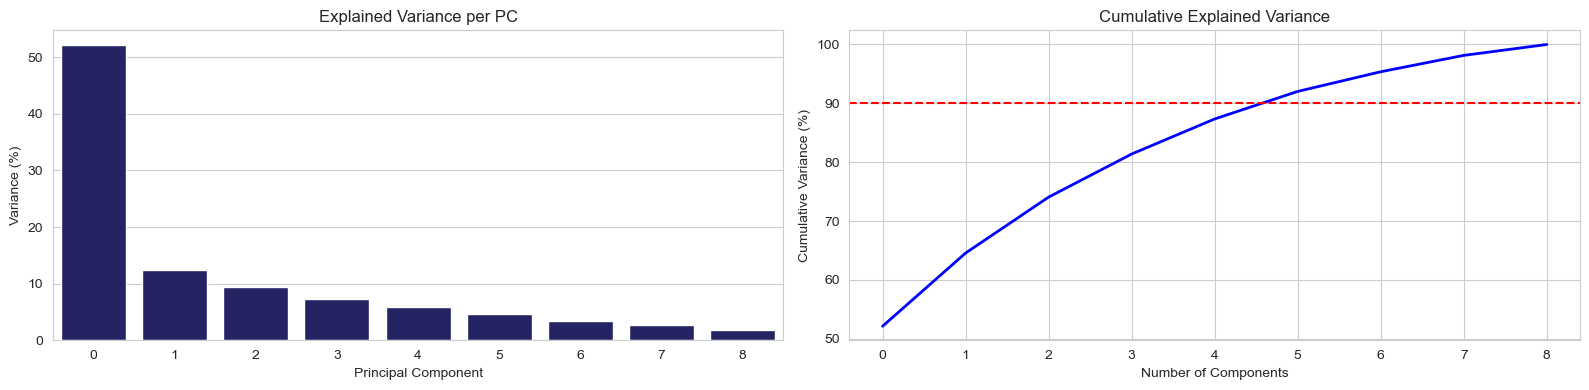

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(selected_features_df)

# Apply PCA without limiting components first
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Calculate explained variance
var_exp = pca.explained_variance_ratio_ * 100
cum_var_exp = np.cumsum(var_exp)

# Automatically select number of components to retain 90% variance
threshold = 90
optimal_components = np.argmax(cum_var_exp >= threshold) + 1
print(f"Cumulative variance explained by {optimal_components} PCs: {round(cum_var_exp[optimal_components - 1], 4)}%")

# Redo PCA with optimal number of components
pca_opt = PCA(n_components=optimal_components)
X_reduced = pca_opt.fit_transform(X_std)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
sns.barplot(x=np.arange(len(var_exp)), y=var_exp, ax=ax[0], color='midnightblue')
ax[0].set_title("Explained Variance per PC")
ax[0].set_xlabel("Principal Component")
ax[0].set_ylabel("Variance (%)")

sns.lineplot(x=np.arange(len(cum_var_exp)), y=cum_var_exp, ax=ax[1], color='blue', linewidth=2)
ax[1].axhline(y=threshold, color='red', linestyle='--')
ax[1].set_title("Cumulative Explained Variance")
ax[1].set_xlabel("Number of Components")
ax[1].set_ylabel("Cumulative Variance (%)")
plt.tight_layout()
plt.show()

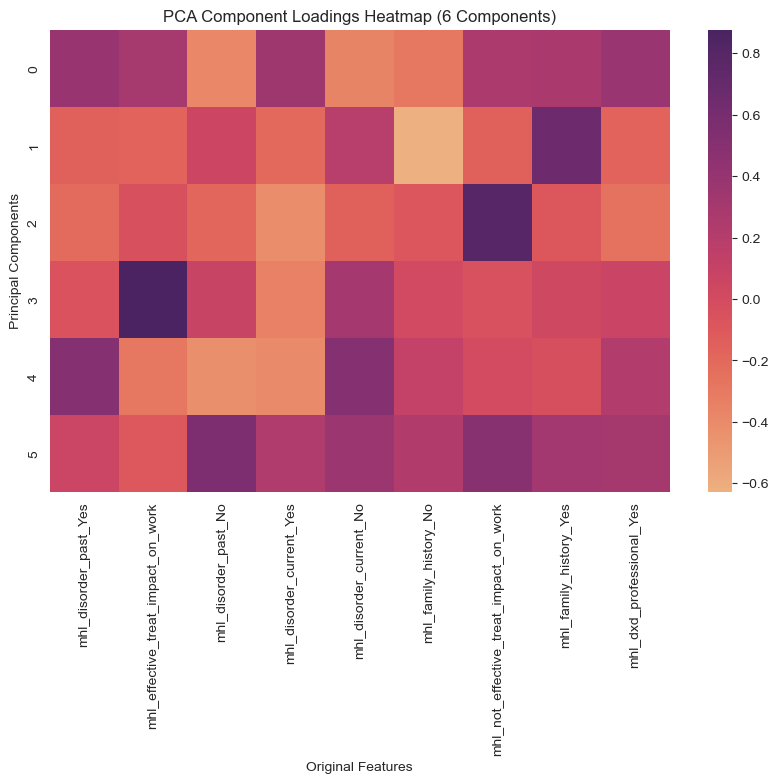

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Apply PCA with 6 components (since they explain ~92% variance)
pca = PCA(n_components=6)
pca_scores = pca.fit_transform(X_std)

# Create a DataFrame for the principal components (feature loadings)
df_comp = pd.DataFrame(pca.components_, columns=selected_features_df.columns)

# Plot heatmap of component loadings
plt.figure(figsize=(10, 6))
sns.heatmap(df_comp, cmap='flare', annot=False)
plt.title("PCA Component Loadings Heatmap (6 Components)")
plt.xlabel("Original Features")
plt.ylabel("Principal Components")
plt.show()

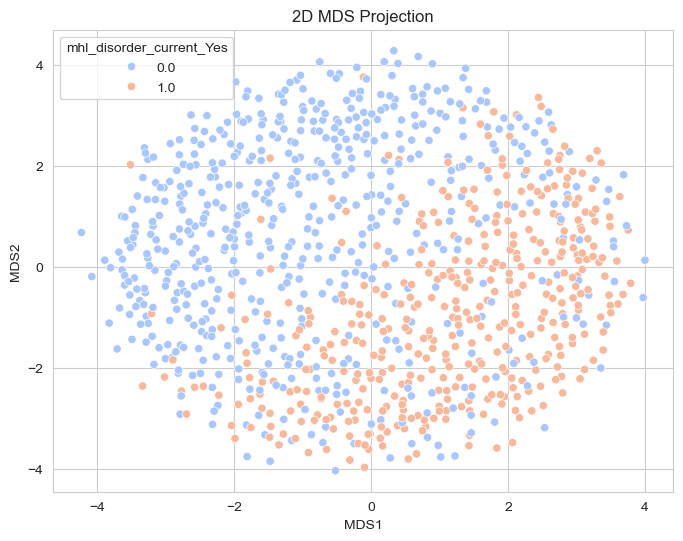

In [4]:
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Separate target and features
y = encoded_df["mhl_disorder_current_Yes"]
X = encoded_df.drop(columns=["mhl_disorder_current_Yes"])

# Scale features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply MDS to reduce to 2 dimensions
mds = MDS(n_components=2, random_state=0)
X_2d = mds.fit_transform(X_scaled)

# Create a DataFrame for easier plotting
mds_df = pd.DataFrame(X_2d, columns=["MDS1", "MDS2"])
mds_df["Target"] = y.values

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=mds_df, x="MDS1", y="MDS2", hue="Target", palette="coolwarm")
plt.title("2D MDS Projection")
plt.xlabel("MDS1")
plt.ylabel("MDS2")
plt.legend(title="mhl_disorder_current_Yes")
plt.show()

In [7]:
import os

# Create the directory named 'processed_data' if it doesn't exist
os.makedirs('processed_data', exist_ok=True)

# Save the selected features CSV inside the 'processed_data' folder
selected_features_df.to_csv('processed_data/pca_score.csv', index=False)
